<a href="https://colab.research.google.com/github/bojiix/RAM-OSI-BAN-AI/blob/bojan/ErrorFilterAndOthers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os
import random

In [10]:
ls

cardio_train.csv  sample_data/


Read CSV, print details about DF

In [54]:
df = pd.read_csv("cardio_train.csv", sep=";") # citirea bazei de date; separarea in functie de ;

In [55]:
df # preview dataframe

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [56]:
df.info() # informatiile dataframe-ului, tip coloane, coloane non-null, nume coloane 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [57]:
df.describe() # calculeaza count, mean, ... max pentru toate datele

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Figures

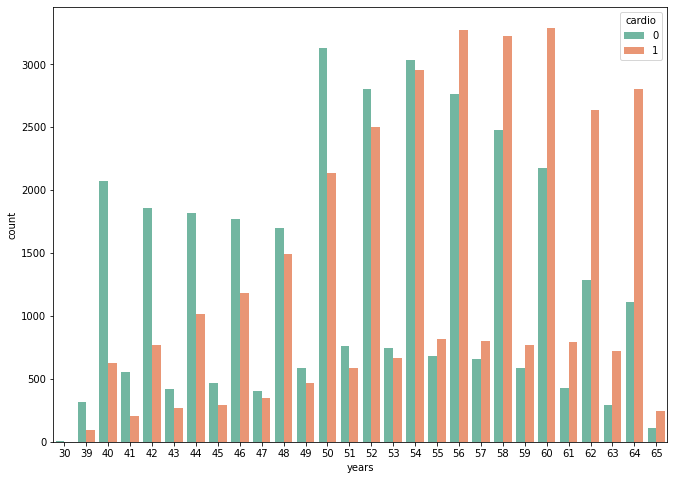

In [58]:
rcParams['figure.figsize'] = 11, 8 # setarea dimensiunii figurii
df['years'] = (df['age'] / 365).round().astype('int') # adaugaarea unei coloane noi pentru calcularea varstei in ani
sns.countplot(x='years', hue='cardio', data = df, palette="Set2"); # generarea figurii; x = varsta, hue = criteriul pe baza caruia se face count

In [59]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']] # filtrare pe baza coloanelor
df_categorical

,cholesterol,gluc,smoke,alco,active
0,1,1,0,0,1
1,3,1,0,0,1
2,3,1,0,0,0
3,1,1,0,0,1
4,1,1,0,0,0
...,...,...,...,...,...
69995,1,1,1,0,1
69996,2,2,0,0,1
69997,3,1,0,1,0
69998,1,2,0,0,0


In [60]:
meltedData= pd.melt(df_categorical) # transformarea coloanelor in valori pe linii
meltedData

,variable,value
0,cholesterol,1
1,cholesterol,3
2,cholesterol,3
3,cholesterol,1
4,cholesterol,1
...,...,...
349995,active,1
349996,active,1
349997,active,0
349998,active,0


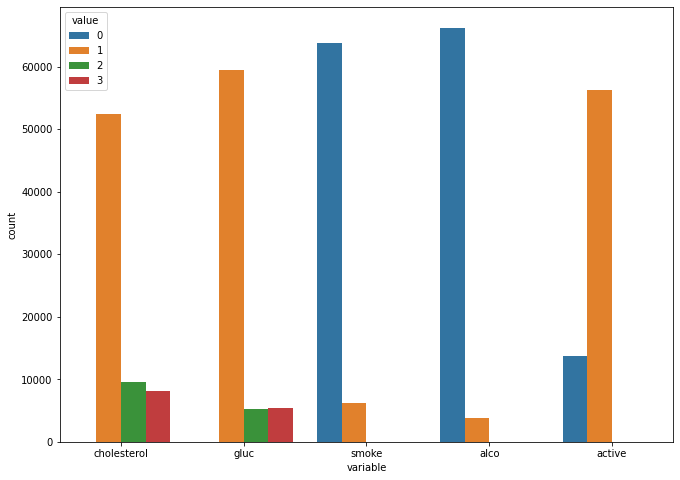

In [61]:
sns.countplot(x="variable", hue="value",data= meltedData); # afisarea noii figuri pe variabile

In [62]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active']) # cream un df cu 3 coloane, cu valorile coloanelor originale
df_long

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,3
2,1,cholesterol,3
3,1,cholesterol,1
4,0,cholesterol,1
...,...,...,...
349995,0,active,1
349996,1,active,1
349997,1,active,0
349998,1,active,0


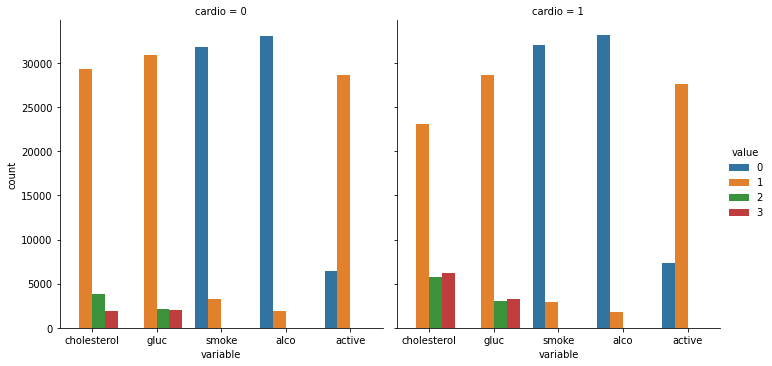

In [63]:
sns.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count"); # cream un category plot, similar count plotului, dar cu un param in plus col

Comparison

In [64]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [65]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [66]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

In [67]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [68]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


Check for errors - test

In [69]:
df.isnull().values.any()

False

In [70]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [71]:
olddf = df.copy()
olddf

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [73]:
df = olddf.copy()

In [74]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [75]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [76]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025)) | (df['ap_lo'] < 0)].index,inplace=True)
df.drop(df[(df['ap_hi'] < 0) | (df['ap_lo'] > df['ap_hi'])].index,inplace=True)

In [77]:
df['id'].count()

60142

In [78]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
blood_pressure

,ap_lo,ap_hi
0,80,110
1,90,140
2,70,130
3,100,150
4,60,100
...,...,...
69993,90,130
69994,80,150
69995,80,120
69998,80,135


In [79]:
blood_pressureMelt = blood_pressure.melt()
blood_pressureMelt

,variable,value
0,ap_lo,80
1,ap_lo,90
2,ap_lo,70
3,ap_lo,100
4,ap_lo,60
...,...,...
120279,ap_hi,130
120280,ap_hi,150
120281,ap_hi,120
120282,ap_hi,135


Diastilic pressure is higher than systolic one in 0 cases


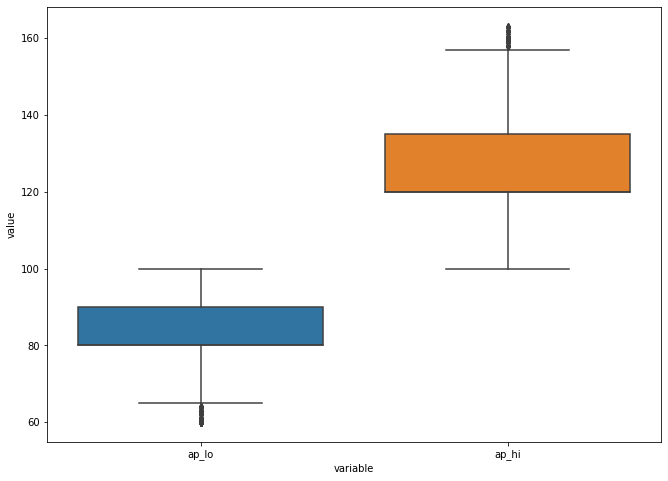

In [80]:
sns.boxplot(x = 'variable',y = 'value',data = blood_pressureMelt)
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

## Fake Data And Error Filtering Task

First - Create Fake Data

In [104]:
aux = olddf.head().copy()
aux

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48


In [105]:
def generateArray(cond, num, lims):
  arr = []
  if cond == True:
    arr = np.random.randint(lims[0], lims[1] + 1, size=num)
  else:
    arr = np.random.randint(lims[1] + 2, 100000, size=num)
  return arr

In [101]:
def createData(assign_vec, num):
  obj = {
      "id": aux.tail(1)['id'] + 1,
      "age": generateArray(assign_vec[1], num, [0, 54750]),
      "gender": generateArray(assign_vec[2], num, [1, 2]),
      "height": generateArray(assign_vec[3], num, [30, 250]),
      "weight": generateArray(assign_vec[4], num, [1, 200]),
      "ap_hi": generateArray(assign_vec[5], num, [0, 200]),
      "ap_lo": generateArray(assign_vec[6], num, [0, 200]),
      "cholesterol": generateArray(assign_vec[7], num, [1, 3]),
      "gluc": generateArray(assign_vec[8], num, [1, 3]),
      "smoke": generateArray(assign_vec[9], num, [0, 1]),
      "alco": generateArray(assign_vec[10], num, [0, 1]),
      "active": generateArray(assign_vec[11], num, [0, 1]),
      "cardio": generateArray(assign_vec[12], num, [0, 1]),
      "years": generateArray(assign_vec[13], num, [0, 125]),
  }
  to_adddf = pd.DataFrame(obj)
  return to_adddf

In [86]:
def generateData(aux, n):
  for i in range(n):
    arr = np.random.choice([True, False], size=len(aux.columns))
    aux = aux.append(createData(arr, 1), ignore_index=True)  
  return aux

In [109]:
aux = generateData(aux, 1)
aux

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
5,5,17695,2,72759,76.0,29443,27,60078,3,0,0,72821,15098,40734
6,6,76004,6154,19221,157.0,170,30090,3,20762,0,89786,91210,0,20814
7,7,49931,2,98824,26665.0,74,67001,3,7805,10881,1,11429,0,16
8,8,50708,2,79069,64.0,61,17977,2,69201,1,92876,97685,13754,75


Second - Check For Errors And Clean Data

In [111]:
def clearErrorsFromMyData(data):
  return data

In [113]:
error = False
aux = clearErrorsFromMyData(aux.copy()) if error == True else aux
aux

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
5,5,17695,2,72759,76.0,29443,27,60078,3,0,0,72821,15098,40734
6,6,76004,6154,19221,157.0,170,30090,3,20762,0,89786,91210,0,20814
7,7,49931,2,98824,26665.0,74,67001,3,7805,10881,1,11429,0,16
8,8,50708,2,79069,64.0,61,17977,2,69201,1,92876,97685,13754,75
